**Ryanair scenario**

In [1]:
from utils.utils import *
from utils.data import *

1. Hypothesis (to be modified)

In [2]:
# Emissions de CO2 en 2023
CO2_2023 = 14.2*10**6       # tCO2/an

# Hypothèses d'évolution de flotte
B737_NG_0 = 213             # Nombre d'anciens avions dans la flotte en 2023
B737_MAX_0 = 85             # Nombre de nouveaux avions dans la flotte en 2023
replacement_nbr = 15        # Nombre d'anciens avions remplacés chaque année
nbr_add_annual = 15         # Augmentation annuelle de la taille de la flotte
em_reduction_rate = 0.2     # Taux de réduction des émissions des nouveaux avions

# Période considérée
beg = 2023
end = 2030

# Part du marché dans l'UE
market_eu = 0.9

# Allowance gratuite en 2023 : émissions de CO2 2023
allowance_free_2023 = CO2_2023*market_eu

2. Data

In [3]:

# Tableau des émissions / an et émissions de CO2 sans SAF
volume_carbu_world, CO2_em_world = fleet_carbu(beg, end, CO2_2023, B737_NG_0, B737_MAX_0, replacement_nbr, em_reduction_rate, nbr_add_annual)

# Extraction des données pour le marché européen
CO2_em = np.array([round(market_eu * i,2) for i in CO2_em_world])
volume_carbu = np.array([round(market_eu * i,2) for i in volume_carbu_world])

# Objectifs incorporations saf EU
incorpo_saf_eu = np.concatenate((np.linspace(obj_2023, obj_2025, 2025-beg+1)[:-1],
                                 np.linspace(obj_2025, obj_2030, end-2025+1)))

# Quotas carbone
quota_eu = np.array([quota_2023, quota_2024, quota_2025, quota_2026, 0, 0, 0, 0])

# Carbon price
carbonprice = np.linspace(carbonprice_2023, carbonprice_2030, end-beg+1)


3. Incorporation rate (to be modified)

In [4]:
# Incorporations
incorpo_2023 = 0              # *100 %
incorpo_2024 = 0.05           # *100 %
incorpo_2025 = 0.10           # *100 %
incorpo_2026 = 0.15           # *100 %
incorpo_2027 = 0.20           # *100 %
incorpo_2028 = 0.30           # *100 %
incorpo_2029 = 0.40           # *100 %
incorpo_2030 = 0.50           # *100 %

incorpo_saf = np.array([incorpo_2023, incorpo_2024, incorpo_2025, incorpo_2026, incorpo_2027, incorpo_2028, incorpo_2029, incorpo_2030])


4. Computation

In [5]:
C_MP_k, C_CO2_k, C_MP_SAF, R_UE, C_MP_k0, C_CO2_k0 = calculs_with_saf(beg, end, volume_carbu,incorpo_saf, allowance_free_2023, quota_eu, carbonprice, price_saf, price_kero, allowance_SAF)

5. Graphs

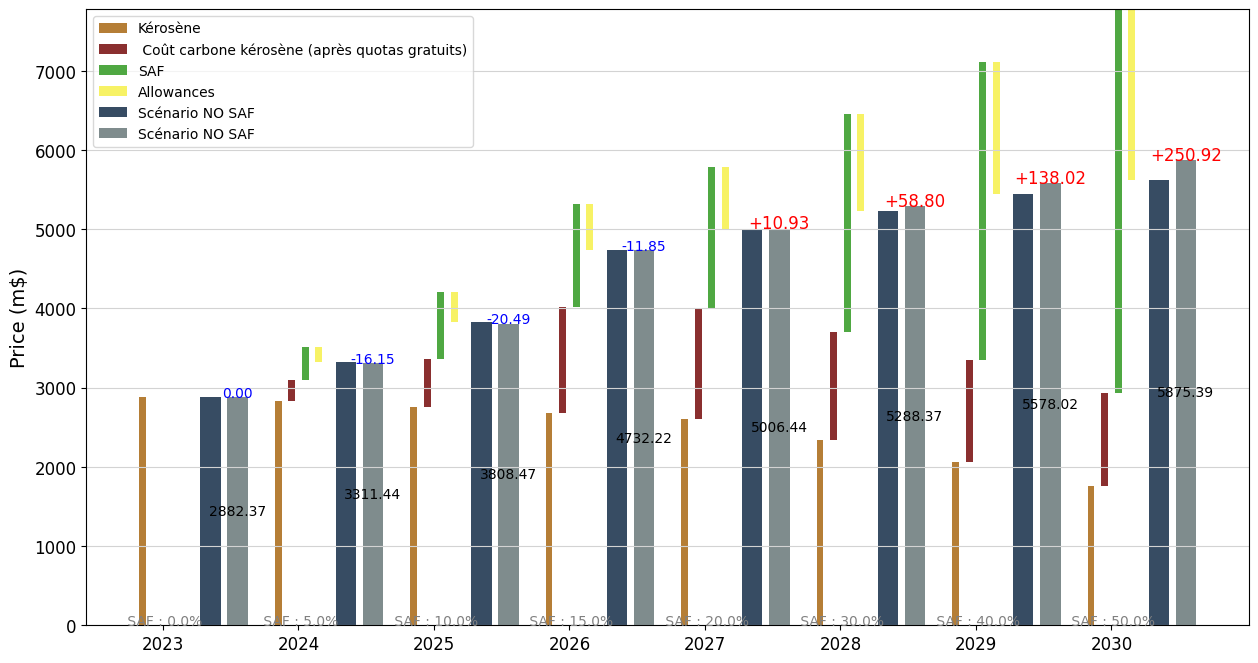

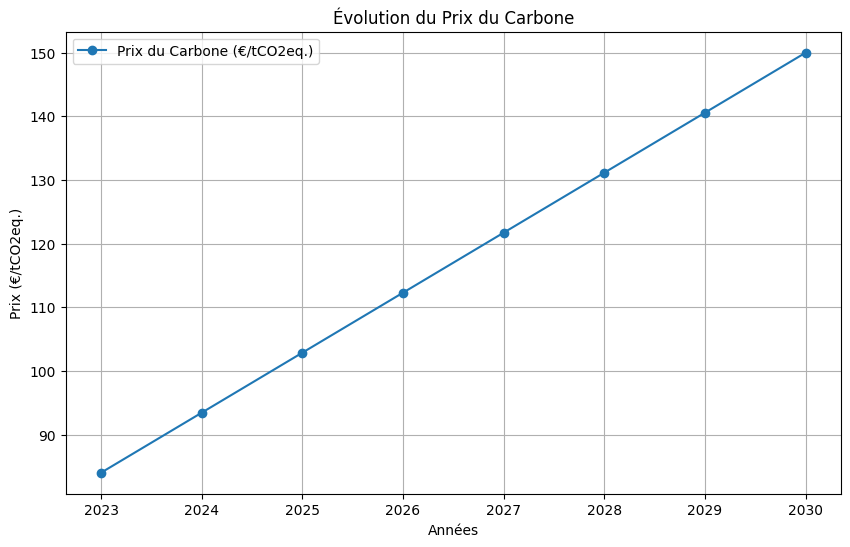

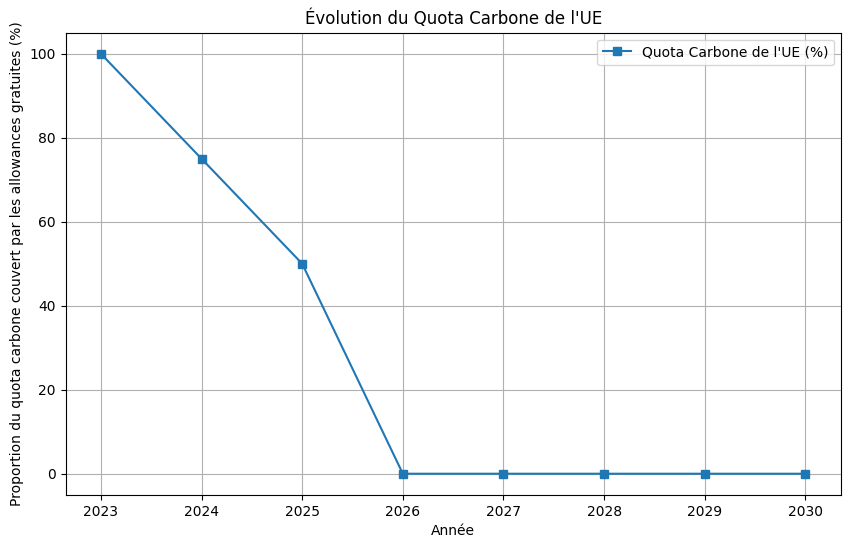

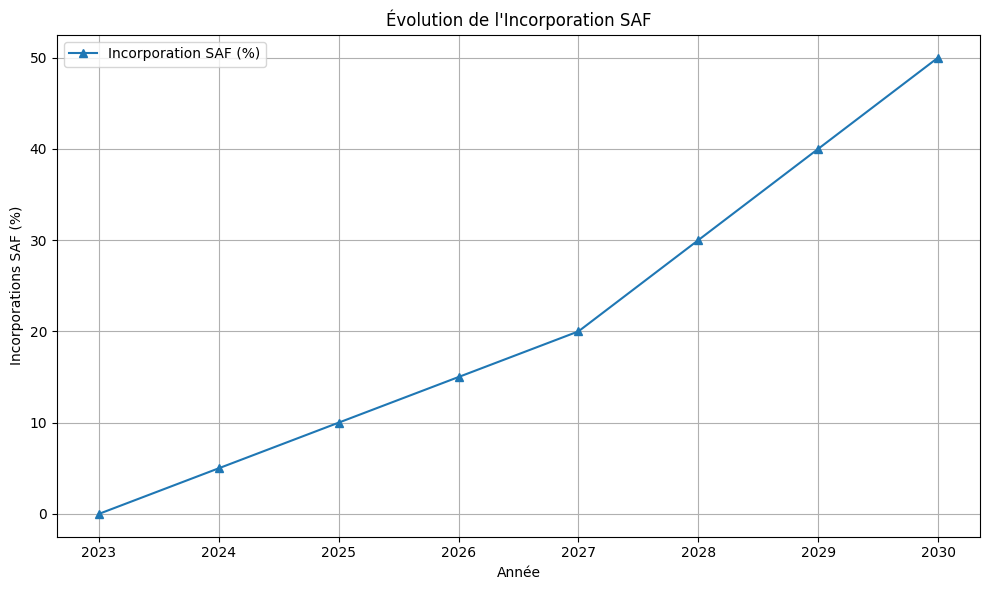

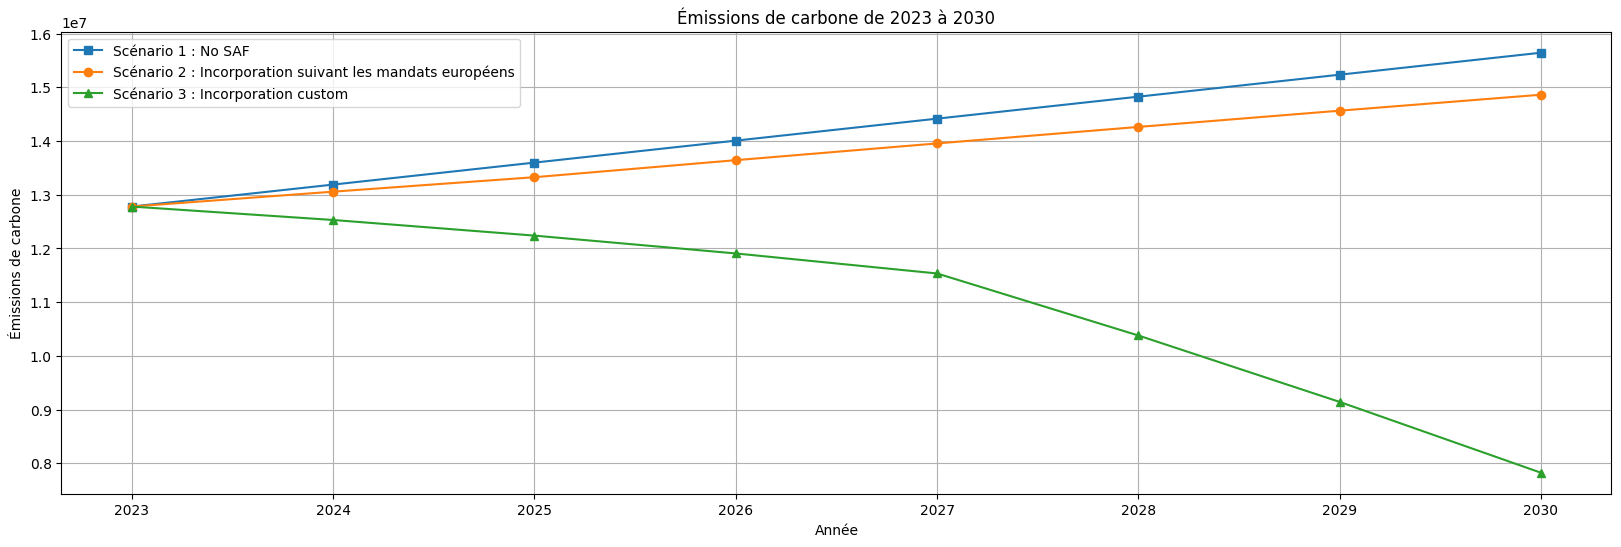

In [6]:
labels = ['Kérosène',
          ' Coût carbone kérosène (après quotas gratuits)',
          'SAF',
          'Allowances',
          'Prix Final',
          'Scénario NO SAF']

data = np.array([np.round(C_MP_k/1000000,2),
                 np.round(C_CO2_k/1000000,2),
                 np.round(C_MP_SAF/1000000,2),
                 np.round(R_UE/1000000,2),
                 np.round((C_MP_k+C_CO2_k+C_MP_SAF+R_UE)/1000000,2),
                 np.round((C_MP_k0 + C_CO2_k0)/1000000,2)])

if __name__ == '__main__':
    
    graphique(data, labels, beg, end, incorpo_saf)
    graphique_hypotheses(beg, end, carbonprice, quota_eu, incorpo_saf)
    graphique_emissionscarbone(CO2_em, incorpo_saf_eu, incorpo_saf)